In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
with open("training_logs.txt", "r") as f:
    data = list(filter(lambda x: x.startswith("------ step"), f.read().splitlines()))

# data looks like this:
# ['------ step 0: train_loss 8.3729 (ct 2.2451, c 3.4439, L2 2.6839), train_accuracy 0.0735 ------',
# '------ step 100: train_loss 5.0956 (ct 0.9171, c 1.6149, L2 2.5635), train_accuracy 0.4468 ------', ]
    
data_dict = {}
    
# get step number:
data_dict['steps'] = [int(line.split(":")[0].split(" ")[-1]) for line in data]

# get train loss:
data_dict['train_loss'] = [float(line.split("train_loss ")[1].split(" ")[0]) for line in data]

# get ct loss:
data_dict['ct_loss'] =  [float(line.split("(ct ")[1].split(",")[0]) for line in data]

# get c loss:
data_dict['c_loss'] = [float(line.split(", c ")[1].split(",")[0]) for line in data]

# get L2 loss:
data_dict['L2_loss'] = [float(line.split(", L2 ")[1].split(")")[0]) for line in data]

# get train accuracy:
data_dict['train_accuracy'] = [float(line.split("train_accuracy ")[1].split(" ")[0]) for line in data]

df = pd.DataFrame(data_dict)

In [23]:
# get validation loss from data
with open("training_logs.txt", "r") as f:
    data = list(filter(lambda x: x.startswith("------") or x.startswith("Validation"), f.read().splitlines()))

validation_information = []
for x in range(2, len(data)):
    if data[x].startswith("Validation"):
        validation_information.append((data[x-2], data[x]))

steps_list = []
loss_list = []
accuracy_list = []
for x, y in validation_information:
    step = int(x.split("step ")[1].split(":")[0])
    loss = float(x.split("loss ")[1].split(" ")[0])
    accuracy = float(y.split("accuracy ")[1].split(" ")[0])

    steps_list.append(step)
    loss_list.append(loss)
    accuracy_list.append(accuracy)


validation_df = pd.DataFrame({"steps": steps_list, "validation_loss": loss_list, "validation_accuracy": accuracy_list})

In [24]:
# left join df and validation_df
df = df.merge(validation_df, how="left", on="steps")

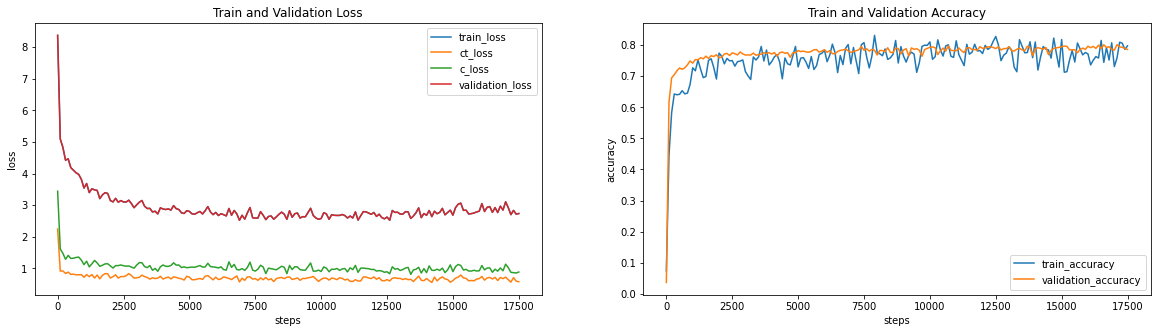

In [25]:
# plot three graphs
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(df["steps"], df["train_loss"], label="train_loss")
ax[0].plot(df["steps"], df["ct_loss"], label="ct_loss")
ax[0].plot(df["steps"], df["c_loss"], label="c_loss")
ax[0].plot(df["steps"], df["validation_loss"], label="validation_loss")
ax[0].set_xlabel("steps")
ax[0].set_ylabel("loss")

ax[1].plot(df["steps"], df["train_accuracy"], label="train_accuracy")
ax[1].plot(df["steps"], df["validation_accuracy"], label="validation_accuracy")

ax[1].set_xlabel("steps")
ax[1].set_ylabel("accuracy")

# titles
ax[0].set_title("Train and Validation Loss")
ax[1].set_title("Train and Validation Accuracy")

# legend
ax[0].legend()
ax[1].legend()
